In [1]:
import numpy as np
import pandas as pd

import json
import re
import matplotlib.pyplot as plt

In [2]:
def count_pages(pages_str):
    
    pages_str = re.sub('\+|,|/',' ',pages_str)
    
    n_pages = 0

    for item in pages_str.split():
        if re.search('^[0-9]+',item):
            if not '-' in item:
                n_pages+=1
            else:
                if 'r' in item or 'v' in item:
                    c = 2
                else:
                    c = 1
                start_page,end_page = item.split('-')

                start_page = re.search('^[0-9]+',start_page).group(0)
                end_page = re.search('^[0-9]*',end_page).group(0)

                if end_page!='':
                    n_pages += c*(int(end_page)-int(start_page)+1)
                    if 'r' in end_page:
                        n_pages -=1
                    if 'v' in start_page:
                        n_pages -=1
                else:
                    n_pages += 1

    return n_pages

In [3]:
with open('data/omeliari_by_ms_7_august_2022.json','r') as f:
    data = json.load(f)

In [4]:
all_manuscripts = tuple(data.keys())

In [5]:
manuscripts_df = pd.DataFrame(index = all_manuscripts, 
                              columns=['works_id', 'fests', 'pericope'], dtype='object')

In [6]:
works_list = []

for manuscript in all_manuscripts:
    
    texts = data[manuscript]
    n_texts = len(texts)
    
    manuscripts_df.loc[manuscript, 'n_texts'] = n_texts
    
    n_pages, n_works = 0, 0
    works_id,fests,pericope = [], [], []
    
    for _, text in texts.items():
        pages_str = text['Pagine/Carte']
        n_pages += count_pages(pages_str)
        text_works = text['works']
        if text_works==None:
            n_works += 1
        else:
            n_works += len(text_works)
            for work in text_works:
                works_list.append(work)
                works_id.append(len(works_list)-1)
        fests.append(text.get('Formulario',None))
        pericope.append(text.get('Pericope',None))
        
    manuscripts_df.loc[manuscript, 'n_pages'] = n_pages
    manuscripts_df.loc[manuscript, 'works_per_text'] = np.round(n_works/n_texts,2)
    manuscripts_df.at[manuscript, 'works_id'] = works_id
    manuscripts_df.at[manuscript, 'fests'] = fests
    manuscripts_df.at[manuscript, 'pericope'] = pericope

In [7]:
manuscripts_df['pages_per_text'] = np.round(manuscripts_df.n_pages/manuscripts_df.n_texts)

In [187]:
all_fests = [y for x in manuscripts_df.fests for y in x if y!=None]
unique_fests = pd.Series(np.unique(all_fests)).sort_values()
unique_fests.to_csv('fests_unique.tsv', index=None, sep='\t')

In [13]:
#manuscripts_df.fests.apply(lambda x:pd.value_counts(x))

In [203]:
manuscripts_df

,works_id,fests,pericope,n_texts,n_pages,works_per_text,pages_per_text
Benev. 8,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[None, None, None, None, None, None, None, Non...","[None, None, Mt 2, 1, None, None, None, None, ...",75.0,518.0,1.03,7.0
Benev. 10,"[77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 8...","[None, None, Felicitas & Filii, None, None, No...","[None, None, Mt 12, 46, None, None, None, None...",68.0,614.0,1.04,9.0
Benev. 11,"[148, 149, 150, 151, 152, 153, 154, 155, 156, ...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...",37.0,512.0,1.00,14.0
Benev. 12,"[185, 186, 187, 188, 189, 190, 191, 192, 193, ...","[None, None, None, None, None, None, None, Non...","[None, Mt 17, 1, None, None, Mt 23, 1-3, None,...",50.0,466.0,1.00,9.0
Benev. 13,"[233, 234, 235, 236, 237, 238, 239, 240, 241, ...","[Oct. Nat. Dni, dominica post Nat. Dni, None, ...","[None, Lc 2, 33, None, None, None, None, Mt 2,...",36.0,310.0,1.11,9.0
Benev. 18,"[273, 274, 275, 276, 277, 278, 279, 280, 281, ...","[None, None, None, None, None, None, None, Non...","[None, None, Lc 21, 25-26, None, None, Mt 11, ...",63.0,512.0,1.08,8.0
Benev. 5,"[341, 342, 343, 344, 345, 346, 347, 348, 349, ...","[None, None, feria 5 hebd. sanctæ, feria 6 heb...","[Lc 1, 26-27, Lc 3, 2, 1 Cor 11, 20-12, 13, Eb...",17.0,130.0,1.06,8.0
Benev. 6,"[357, 358, 359, 360, 361, 362, 363, 364, 365, ...","[None, None, None, None, Sancti omnes, None, N...","[None, None, None, Lc 19, 41-42, None, None, N...",52.0,448.0,1.00,9.0
Casin. 98,"[409, 410, 411, 412, 413, 414, 415, 416, 417, ...","[Maria: Annuntiatio, Maria: Purificatio, Maria...","[None, None, None, None, Lc 2, 22-23, Lc 2, 22...",40.0,674.0,1.08,17.0
Casin. 99,"[452, 453, 454, 455, 456, 457, 458, 459, 460, ...","[Nat. Dni: vig., Nat. Dni: vig., Nativitas Dni...","[Mt 1, 18-19, None, None, None, None, None, No...",43.0,520.0,1.00,12.0


In [15]:
works_df = pd.DataFrame(works_list).astype(str)

In [16]:
works_df['author'] = works_df['Autore/Opera'].apply(lambda x:x.split(',')[0])
works_df['author'] = works_df['author'].apply(lambda x:re.sub('\s*.\?.\s*','',x))
works_df.loc[works_df.author.str.contains('Lam 2 '),'author'] = 'Lam 2 ...'

In [17]:
works_df['n_pages'] = works_df['Pagine/Carte'].apply(count_pages)

In [18]:
manuscript_authors_df = manuscripts_df.works_id.apply(lambda x:works_df.loc[x].author.value_counts())
manuscript_authors_df = manuscript_authors_df.fillna(0)

<AxesSubplot:>

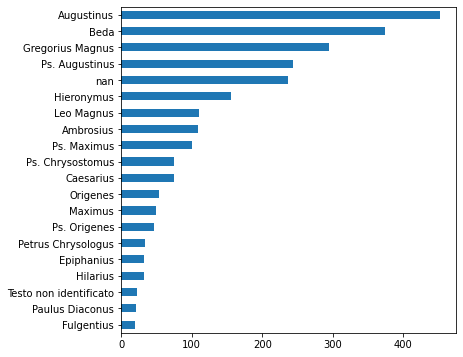

In [19]:
fig, ax = plt.subplots(figsize=(6,6))
works_df.author.value_counts().sort_values().iloc[-20:].plot(kind='barh')

<AxesSubplot:>

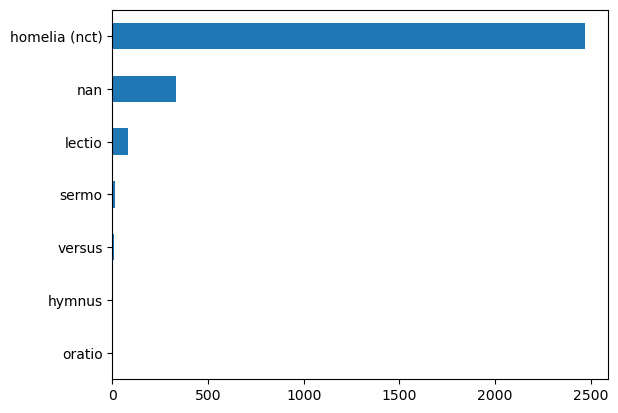

In [162]:
#fig, ax = plt.subplots(figsize=(6,6))
works_df.Forma.value_counts().sort_values().plot(kind='barh')

In [168]:
all_authors = manuscript_authors_df.columns.sort_values()

In [176]:
authors_intersect = pd.DataFrame(index=all_authors, columns=all_authors)

for author1 in all_authors:
    for author2 in all_authors:
        n_manuscripts = ((manuscript_authors_df[[author1,author2]]>0).sum(axis=1)==2).sum()
        authors_intersect.loc[author1,author2] = n_manuscripts

In [179]:
authors_intersect

,1 Cor 11,1 Cor 12,1 Cr 21,1 Cr 28,1 Paralip. 21,1 Tm 3,2 Cor 11,2 Cr 5,Act 9,Adalbertus Pragensis,...,Testo non identificato,Translatio Marci ep.,Versus de s. Menna,Vita s. Silvestri,Vita Leonardi,Vita s. Mauri,cfr. Beda,cfr. Ps. Augustinus,nan,testo non identificato
1 Cor 11,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1 Cor 12,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1 Cr 21,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1 Cr 28,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1 Paralip. 21,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vita s. Mauri,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
cfr. Beda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
cfr. Ps. Augustinus,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0
nan,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,5.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,12.0,0.0


In [180]:
all_authors[0]

'1 Cor 11'

In [181]:
works_df[works_df.author=='1 Cor 11']

,Pagine/Carte,Incipit,Explicit,Forma,Autore/Opera,Note,Edizioni,Passo biblico,author,n_pages
230,186v-187r,Convenientibus vobis in unum,et omnes uno spiritu potati sumus,lectio,"1 Cor 11, 20-12, 13",nan,nan,nan,1 Cor 11,4
343,129v-130v,Convenientibus nobis in unum,uno spiritu potati sumus,lectio,"1 Cor 11, 20-12, 13",nan,nan,nan,1 Cor 11,4
1725,338,Convenientibus ergo vobis in unm,in meam commemorationem,nan,"1 Cor 11, 20-24",nan,nan,nan,1 Cor 11,1
1726,338-339,Similiter et calicem,cum venero disponam,nan,"1 Cor 11, 25-34",nan,nan,nan,1 Cor 11,2


In [23]:
works_df[works_df['Passo biblico']!='nan']['Passo biblico'].value_counts()

Homo erat paterfamilias (Mt 21, 33)                                         5
Cogitaverunt autem principes sacerdotum … credebant in Iesum (Gv 12, 10)    3
Si peccaverit in te frater tuus increpa illum (Lc 17, 3)                    3
Cum autem duodecim esset annorum ... (Lc 2, 42)                             2
Scitis quia post biduum … crucifigatur (Mt 26, 2)                           2
                                                                           ..
Et egressus iesus … ad eum (Mc 2, 13)                                       1
Quare discipuli tui ... seniorum (Mt. 15, 2)                                1
Quicumque baptizati sumus … in Christo … sumus (Rm 6, 3)                    1
Non est opus sanis … peccatores (Lc 5, 31-32)                               1
Et factum est deinceps … naim (Lc 7, 11)                                    1
Name: Passo biblico, Length: 492, dtype: int64

In [17]:
works_df

,Pagine/Carte,Incipit,Explicit,Forma,Autore/Opera,Note,Edizioni,Passo biblico,author,n_pages
0,001r-002v,[...] mag[n]us humilis procidit quem pastor in...,sine aliqua miseria concedetur eterna felicitas,homelia (nct),"Fulgentius, S. 6, 2-7",Acefalo,"CCL 91A, 926, l. 36-929; CPL 833",nan,Fulgentius,4
1,002v-004r,Nuper celebravimus diem quo ex Iudaeis dominus...,etiam ex gentibus peccatores,homelia (nct),"Augustinus, S. 199",nan,"PL 38, 1026-1028",nan,Augustinus,6
2,004r-006v,Sicut in lectione evangelica fratres karissimi...,ad eam malis amari castis redeamus,homelia (nct),"Gregorius Magnus, In ev. I, 10",nan,"CCL 141, 65-72",nan,Gregorius Magnus,6
3,006v-007v,Audistis fratres lectione evangelii salutaria ...,regnantem abeamus in caelo,homelia (nct),"Ps. Maximus, Hom. Bruni 25",nan,"PL 57, 279-282; CPPM I, 2330; 5778",nan,Ps. Maximus,4
4,007v-009r,Quamvis dilectissimi fratres christus salutis ...,ad dexteram patris amplectamur in caelo,homelia (nct),"Ps. Maximus, Hom. Bruni 26",nan,"PL 57, 281-284; CPPM I, 5755 B; 5779",nan,Ps. Maximus,6
...,...,...,...,...,...,...,...,...,...,...
2899,149r-153r,Admonet nos dominus noster non negligere invicem,simul de mercede gaudeamus amen,nan,"Augustinus, S. 82",Omissione a f. 150rA l. 7 corrispondente a PL ...,"PL 38, 506-514",nan,Augustinus,10
2900,153r-155r,Si [ma: Mira] phariseorum scribarumque stultitia,iaculo vulneratum,homelia (nct),"Hieronymus, In Mt II, 15","L'incipit corretto, Mira, è eraso e sostituito...","CCL 77, 127, l. 1399-132, l. 1535",nan,Hieronymus,6
2901,155r-157r,Vide clementiam domini salvatoris nec indignat...,sedem quam acceperunt servare non possint,homelia (nct),"Ambrosius, In Lc IV, 57-67",nan,"CCL 14, 126, l. 702-131, l. 845",Socrus symonis petri tenebatur magnis febribus...,Ambrosius,6
2902,"157r-161v, 163r-163v, 162r-162v",Non rude est auribus caritati vestre,quoniam vere ipse est salvator mundi,homelia (nct),"Augustinus, Tract. in Ioh. 15",nan,"CCL 36, 150-164",nan,Augustinus,14


In [24]:
works_df.Forma.value_counts()

homelia (nct)    2470
nan               330
lectio             80
sermo              12
versus              9
hymnus              2
oratio              1
Name: Forma, dtype: int64

In [183]:
passo_biblico_unqiue = works_df[works_df['Passo biblico']!='nan']['Passo biblico'].unique()

In [184]:
def get_regex_match(pattern, search_str):
    try:
        return re.search(pattern, search_str).groups()[0].strip()
    except Exception:
        print(f'WARNING regex pattern "{pattern}" not found in "{search_str}"')
        return '-'

phrase = map(lambda x:x.split('(')[0].rstrip(),passo_biblico_unqiue)

book = map(lambda x:get_regex_match('\(([^\s]*)',x),passo_biblico_unqiue)

volume = map(lambda x:get_regex_match('([0-9\-\s]+),',x),passo_biblico_unqiue)

pages = map(lambda x:get_regex_match('([0-9\-\s]+)\)',x),passo_biblico_unqiue)

In [185]:
passo_biblico_df = pd.DataFrame({'original_string':passo_biblico_unqiue, 'phrase':phrase, 'book': book, 'volume': volume, 'pages': pages}).sort_values(by='book')

WARNING regex pattern "\(([^\s]*)" not found in "Nemo potest duobus domini servire"
WARNING regex pattern "\(([^\s]*)" not found in "Factum est autem ... stagnum genesareth"
WARNING regex pattern "\(([^\s]*)" not found in "Ascendens autem iesus in unam navem … aliquantulum"
WARNING regex pattern "\(([^\s]*)" not found in "Quis ex vobis inquit … quae erravit"
WARNING regex pattern "\(([^\s]*)" not found in "Accesserunt ad iesum scribae et pharisaei dicentes magister volumus a te signum videre Cfr. Mt 12, 38"
WARNING regex pattern "\(([^\s]*)" not found in "Ecce ego mitto ad vos prophetas ..."
WARNING regex pattern "\(([^\s]*)" not found in "Postquam consumati sunt die octo ..."
WARNING regex pattern "\(([^\s]*)" not found in "Descendente Iesu de monte ..."
WARNING regex pattern "\(([^\s]*)" not found in "Cum ergo esset sero die illo una sabbatorum ...  et latus"
WARNING regex pattern "\(([^\s]*)" not found in "Et cum introisset Ierosolymam … et reliqua"
WARNING regex pattern "\(([^\s]*)

In [186]:
passo_biblico_df.to_csv('passo_biblico_unique.tsv', index=None, sep='\t')

In [176]:
works_unique = works_df[['Autore/Opera', 'author', 'Forma']]

In [177]:
works_unique['opera'] = works_df['Autore/Opera'].apply(lambda x:','.join(x.split(',')[1:]))

<ipython-input-177-54a642f1ce94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  works_unique['opera'] = works_df['Autore/Opera'].apply(lambda x:','.join(x.split(',')[1:]))


In [178]:
works_unique = works_unique[~(works_unique['Autore/Opera']=='nan')].sort_values(by=['author','opera']).drop_duplicates()

In [182]:
works_unique[['Autore/Opera', 'author', 'opera', 'Forma']].to_csv('works_unqiue.tsv', index=None, sep='\t')